# **CS 2302 Data Structures**

Author: Olac Fuentes, University of Texas at El Paso

Last modified: 2021/11/19

# **Graph Algorithms - Dijkstra's Algorithm and Topological Sort**

## **Definitions**

A **path** in a graph *G=(V,E)* is a sequence of vertices *v0,v1,v2,…,vn* of length greater than 1 such that:

```
For 0 < i < n:
  (vi-1,vi) is in E
```


For example, if G is the graph in the image:

0,1 is a path in G

1,2,3  is a path in G

2,3,4,1,2 is a path in G

1,0,2,3,4 is NOT a path in G

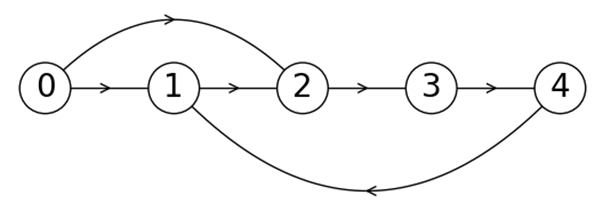

In an undirected graph *G=(V,E)*, vertices *u* and *v* are **connected** if there is a path from *u* to *v* in *G*.
For example, if *G* is the graph in the image

Vertices 2 and 4 are connected

Vertices 3 and 5 are connected

Vertices 0 and 5 are NOT connected

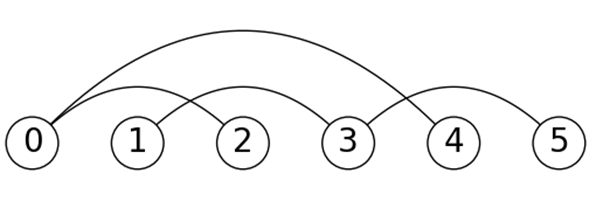

A **cycle** in a graph G=(V,E) is a path v0,v1,v2,…,vn of length greater than 1 where v0=vn 

For example, if G is the graph in the image

2,3,4,1,2 is a cycle in G

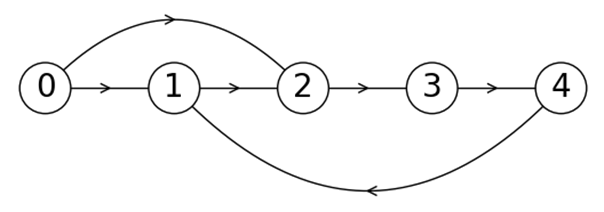

The **cost** of a path is the sum of the weights of the edges in the path.

In an unweighted graph this is equivalent to the number of edges in the path.

The cost of path 0,1,2,3 in the graph below is 7 (4+2+1).


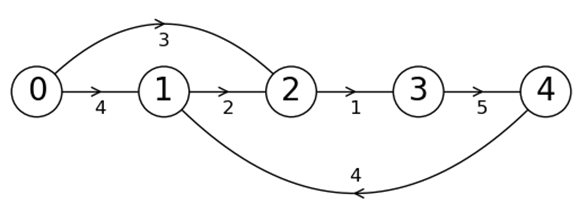


The goal of **graph search** is to find a **path** from a source vertex to every vertex in the graph. 

In some cases, we are also interested in finding the **shortest path** from a source to every vertex in the graph. 

For example, if G is the graph below and the source vertex is 0, a graph search algorithm may find the following paths to vertices 0 to 6:

[0]

[0,1]

[0,2]

[0,2,3]

[0,1,4]

[0,1,4,5]

[0,2,3,6]

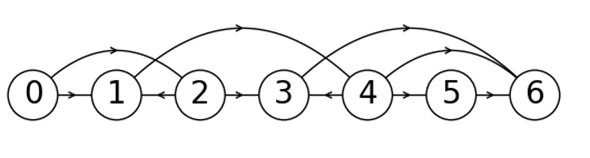

## **Single-source Shortest Paths - Dijkstra's Algorithm**

Goal: find the shortest path from a source vertex to every vertex in a weighted graph.

### **Description:**

Let the vertex at which we are starting be called the **source**. Let the distance of node v **dist[v]** be the length of the shortest path from the source to v. The algorithm starts with infinite distances for all vertices and tries to improve them step by step. 

1.   Create a set of **visited** vertices, which will be initally empty. If a vertex v is in the visited set, it means that the path with the shortest posible distance to v has been found.
2.   Create array **prev**, where **prev[v]** is vertex that appears before **v** in the path from **source** to **v**. Initially, **prev[v] = -1** for all vertices.
2.   Create array **dist**, where **dist[v]** is the length of the shortest path found from the source to vertex v. Initially, **dist[source]**=0, and **dist[v]** infinity for all other vertices.
3.   Find the vertex **v** that is not in **visited** whose distance is smallest (in the first iteration, v will be the source, since **dist[source]**=0 and **visited** is empty). 
4.  Add **v** to the visited set (the shortest possible path to **v** has been found). 
5.  Check if shorter paths to **v**'s neighbors can be found. For each edge **(v,u,w)** going out from v:
```
  if dist[u] > dist[v]+ w: 
      dist[u] = dist[v]+ w 
```
6.  Check if there are vertices not yet visited. If **visited != V** go to 3.
1.   Return **prev**, **dist**

Pseudocode:

```
def dijkstra(G,source): 
    visited = set()
    dist  = [math.inf for v in G.AL]
    prev  = [-1 for v in G.AL]
    dist[source] = 0  # dist to source is 0, dist to all other vertices is infinity
    while there are unvisited vertices v such that dist[v] != math.inf:
        v = vertex not in visited with minimum dist
        visited.add(v)
        for all neighbors u of v: # Check if a better path to u has been found
            if dist[u] < dist[v] + weight(u,v):
                dist[u] = dist[v] + weight(u,v)
                prev[u] = v
    return prev, dist
```

Variables:


```
dist - dist[v] contains the shortest distance found so far to vertex v
prev - prev[v] contains the previous vertex in the path to v
visited - set containing the vertices for which we have found an optimal path
```



Let's trace the algorithm on the following graph, with vertex 0 as the source.

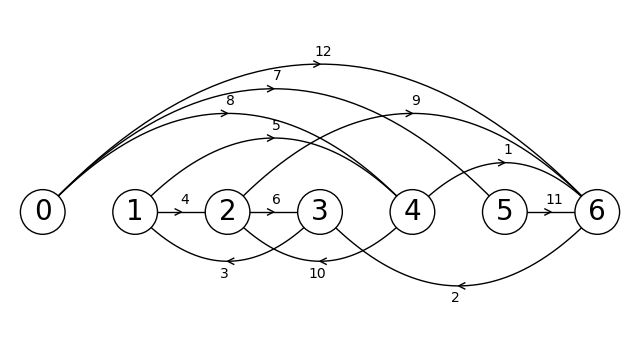

Before entering the while loop:

```
visited = set()
dist = [0, inf, inf, inf, inf, inf, inf]
prev = [-1, -1, -1, -1, -1, -1, -1]
```
The vertex not in visited with minimum dist is 0, which has neighbors 4, 5, and 6.

We add 0 to the visited set.

We find shorter paths to 4, 5, and 6 going through 0. We update dist and prev accordingly.

```
v = 0
visited = {0}
dist = [0, inf, inf, inf, 8, 7, 12]
prev = [-1, -1, -1, -1, 0, 0, 0]
```
The vertex not in visited with minimum dist is 5, which has neighbors 6. 

We add 5 to the visited set.

The path to 6 going through 5 is not shorter than the shortest path to 6 found so far, so dist and prev are not changed.

```
v = 5
visited = {0, 5}
dist = [0, inf, inf, inf, 8, 7, 12]
prev = [-1, -1, -1, -1, 0, 0, 0]
```
The vertex not in visited with minimum dist is 4, which has neighbors 2 and 6.

We add 4 to the visited set.

We find shorter paths to 2 and 6 going through 4. We update dist and prev accordingly.

```
v = 4
visited = {0, 4, 5}
dist = [0, inf, 18, inf, 8, 7, 9]
prev = [-1, -1, 4, -1, 0, 0, 4]
```

The vertex not in visited with minimum dist is 6, which has neighbor 3.

We add 6 to the visited set.

We find a shorter path to 3 going through 6. We update dist and prev accordingly.

```
v = 6
visited = {0, 4, 5, 6}
dist = [0, inf, 18, 11, 8, 7, 9]
prev = [-1, -1, 4, 6, 0, 0, 4]
```

The vertex not in visited with minimum dist is 3, which has neighbor 1.

We add 3 to the visited set.

We find a shorter path to 1 going through 3. We update dist and prev accordingly.

```
v = 3
visited = {0, 3, 4, 5, 6}
dist = [0, 14, 18, 11, 8, 7, 9]
prev = [-1, 3, 4, 6, 0, 0, 4]
```

The vertex not in visited with minimum dist is 1, which has neighbors 2 and 4.

We add 1 to the visited set.

The paths to 2 and 4 going through 1 are not shorter than the shortest paths  found so far, so dist and prev are not changed.

```
v = 1
visited = {0, 1, 3, 4, 5, 6}
dist = [0, 14, 18, 11, 8, 7, 9]
prev = [-1, 3, 4, 6, 0, 0, 4]
```

The vertex not in visited with minimum dist is 2, which has neighbors 3 and 6.

We add 2 to the visited set.

The paths to 3 and 6 going through 2 are not shorter than the shortest paths  found so far, so dist and prev are not changed.

```
v = 2
visited = {0, 1, 2, 3, 4, 5, 6}
dist = [0, 14, 18, 11, 8, 7, 9]
prev = [-1, 3, 4, 6, 0, 0, 4]
```

visited == V; we are done!

```
dist = [0, 14, 18, 11, 8, 7, 9]
prev = [-1, 3, 4, 6, 0, 0, 4]
```

### **Implementation**

In order to find the vertex with the shortest distance efficiently, we will use a min heap.

We will also use the adjacency graph representation library we have used before.  

First we need to upload these libraries.


In [ ]:
from google.colab import files
uploaded = files.upload()

Let's make sure the programs are present.

In [ ]:
!ls

We will also use the following function to generate random graphs. 

In [1]:
def random_graph(nv,ne,weighted=True, directed = True,seed=-1):
    if seed>=0:
        np.random.seed(seed)
    G=graph_AL.Graph(nv,weighted=weighted, directed = directed)
    edges = set()
    ne = min(ne,nv*(nv-1)//2)
    while len(edges) < ne:
        source = np.random.randint(nv)
        dest = (np.random.randint(1,nv)+source)%nv
        if (source,dest) not in edges and (dest,source) not in edges:
            edges.add((source,dest))
    if weighted:
        w = np.random.permutation(ne) + 1
    else:
        w = np.ones(ne,dtype=np.int32)
    for i, edge in enumerate(edges):
        G.insert_edge(edge[0],edge[1],w[i])
    return G

The code for Dijkstra's algorithm is as follows:

In [2]:
def dijkstra(G,source=0,trace=False):
    visited = set()
    dist  = [math.inf for v in G.AL]
    prev  = [-1 for v in G.AL]
    dist[source] = 0
    H = min_heap.min_heap()
    H.insert(min_heap.heap_record(0,source))
    if trace:
        print('visited =',visited)
        print('dist =',dist)
        print('prev =',prev)
    while len(H.heap)>0 and len(visited)<len(G.AL):
        # if trace: H.draw() # Uncoment it to draw heap at evey step
        v = H.extract_min().data
        if v not in visited and dist[v] != math.inf:
            visited.add(v)
            for edge in G.AL[v]:
                alt_dist = dist[v] + edge.weight
                if alt_dist < dist[edge.dest]: # Path going through v is shorter than previously found path
                    dist[edge.dest] = alt_dist
                    prev[edge.dest] = v
                    H.insert(min_heap.heap_record(alt_dist,edge.dest))
            if trace:
                print('******************************')
                print('v =',v)
                print('visited =',visited)
                print('dist =',dist)
                print('prev =',prev)
    return prev,dist

The code for finding the shortest paths in the graph above is shown below. 

If the flag 'trace' is set to True, it will display all intermediate results.

Graph representation
directed: True, weighted: True
Adjacency list:
AL[0]=[(1,9)]
AL[1]=[(5,10), (3,8)]
AL[2]=[(4,3), (1,11), (3,6)]
AL[3]=[(4,2)]
AL[4]=[(1,1), (5,12)]
AL[5]=[(0,5), (3,7), (2,4)]
visited = set()
dist = [0, inf, inf, inf, inf, inf]
prev = [-1, -1, -1, -1, -1, -1]
******************************
v = 0
visited = {0}
dist = [0, 9, inf, inf, inf, inf]
prev = [-1, 0, -1, -1, -1, -1]
******************************
v = 1
visited = {0, 1}
dist = [0, 9, inf, 17, inf, 19]
prev = [-1, 0, -1, 1, -1, 1]
******************************
v = 3
visited = {0, 1, 3}
dist = [0, 9, inf, 17, 19, 19]
prev = [-1, 0, -1, 1, 3, 1]
******************************
v = 5
visited = {0, 1, 3, 5}
dist = [0, 9, 23, 17, 19, 19]
prev = [-1, 0, 5, 1, 3, 1]
******************************
v = 4
visited = {0, 1, 3, 4, 5}
dist = [0, 9, 23, 17, 19, 19]
prev = [-1, 0, 5, 1, 3, 1]
******************************
v = 2
visited = {0, 1, 2, 3, 4, 5}
dist = [0, 9, 23, 17, 19, 19]
prev = [-1, 0, 5, 1, 3, 1]
Results:
pre

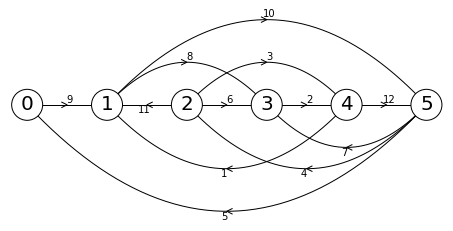

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
import min_heap
import graph_AL

seed = -1 # Set seed to negative value to obtain truly random graphs
G = random_graph(6,12,seed=seed)
G.display()
G.draw()
prev,dist = dijkstra(G,source=0,trace=True)
print('Results:')
print('prev = ',prev)
print('dist = ',dist)

## **Topological Sort**

A topological sort in a directed graph G=(V,E) is an ordering of the vertices in V in such way that if there is a path from u to v in G, then u appears before v in the ordering.


Consider graph G shown below.

T =[0,2,1,4,3,5,6] is a topological sort of G

T =[0,2,1,4,5,3,6] is also a topological sort of G

T =[0,1,2,3,4,5,6] is NOT a topological sort of G, since there is a path from 2 to 1, but 2 does not appear before 1 in T

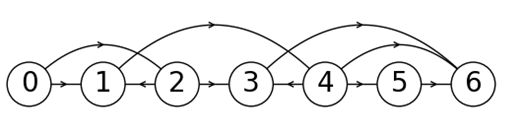

Consider graph G shown below.

G does not have a topological sort.

Notice that there is a path from 1 to 2, but there is also a path from 2 to 1, and obviously there can be no ordering where 1 appears before 2 and 2 appears before 1.

G has a cycle [1,2,3,4,1]

In general, if graph G has a cycle, then G has no topological sort.

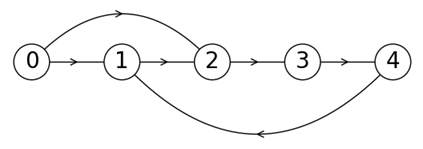


Algorithm:
```
topological_sort(G)
  compute in degrees of all vertices in G
  add to a queue Q  all vertices that have in degree equal to 0
  T = []
  while Q is not empty
    v = Q.dequeue()
    append v to T
    for each neighbor u of v
      in_degree[u] = in_degree[u] - 1  
      if in_degree[u] == 0 
        Q.enqueue(u)
  if |T| == |V| return T
  else return None  # G has a cycle and thus no topological sort
```

The implementation of topological sort and two examples are shown below. You need to copy and paste it and run it on Spyder, as it uses some libraries not included in this notebook.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import graph_AL

def in_degrees(G):
    L = [0 for i in range(len(G.AL))]
    for vert in G.AL:
        for edge in vert:
            L[edge.dest] +=1
    return L

def topological_sort(G,trace=False):
    in_deg = in_degrees(G)
    ts = []
    Q = [i for i in range(len(in_deg)) if in_deg[i]==0]
    if trace:
      print('Q=',Q)
      print('in_deg=',in_deg)
    while len(Q)>0:
        v = Q.pop(0)
        ts.append(v)
        for edge in G.AL[v]:
            u = edge.dest
            in_deg[u] -= 1
            if in_deg[u] == 0:
                Q.append(u)
        if trace:
            print('v=',v)
            print('Q=',Q)
            print('in_deg=',in_deg)
    if len(ts) == len(G.AL):
        return ts
    return None

=== Graph 1 ===
Q= [0]
in_deg= [0, 2, 3, 2, 1, 3, 2, 1, 2]
v= 0
Q= [4]
in_deg= [0, 1, 3, 2, 0, 3, 2, 1, 2]
v= 4
Q= [1, 7]
in_deg= [0, 0, 3, 2, 0, 2, 2, 0, 2]
v= 1
Q= [7]
in_deg= [0, 0, 2, 2, 0, 1, 2, 0, 2]
v= 7
Q= [5]
in_deg= [0, 0, 2, 2, 0, 0, 2, 0, 1]
v= 5
Q= [8]
in_deg= [0, 0, 1, 2, 0, 0, 1, 0, 0]
v= 8
Q= [6]
in_deg= [0, 0, 1, 2, 0, 0, 0, 0, 0]
v= 6
Q= [2]
in_deg= [0, 0, 0, 1, 0, 0, 0, 0, 0]
v= 2
Q= [3]
in_deg= [0, 0, 0, 0, 0, 0, 0, 0, 0]
v= 3
Q= []
in_deg= [0, 0, 0, 0, 0, 0, 0, 0, 0]
Topological sort: [0, 4, 1, 7, 5, 8, 6, 2, 3]


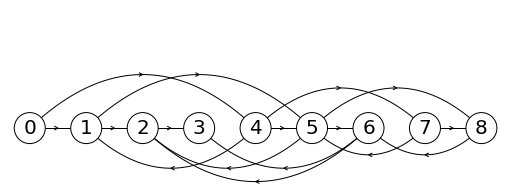

In [10]:
print('=== Graph 1 ===')
G =graph_AL.Graph(9,directed = True)
G.insert_edge(0,1)
G.insert_edge(0,4)
G.insert_edge(1,2)
G.insert_edge(1,5)
G.insert_edge(2,3)
G.insert_edge(4,1)
G.insert_edge(4,5)
G.insert_edge(4,7)
G.insert_edge(5,2)
G.insert_edge(5,6)
G.insert_edge(5,8)
G.insert_edge(6,2)
G.insert_edge(6,3)
G.insert_edge(7,5)
G.insert_edge(7,8)
G.insert_edge(8,6)
G.draw(' ')
s = topological_sort(G,trace=True)
print('Topological sort:',s)


===Graph 2 ===
Q= [0]
in_deg= [0, 3, 4, 1, 1, 2, 2, 1, 2]
v= 0
Q= [4]
in_deg= [0, 2, 4, 1, 0, 2, 2, 1, 2]
v= 4
Q= [7]
in_deg= [0, 1, 4, 1, 0, 1, 2, 0, 2]
v= 7
Q= [5]
in_deg= [0, 1, 4, 1, 0, 0, 2, 0, 1]
v= 5
Q= [1, 8]
in_deg= [0, 0, 3, 1, 0, 0, 1, 0, 0]
v= 1
Q= [8]
in_deg= [0, 0, 2, 1, 0, 0, 1, 0, 0]
v= 8
Q= [6]
in_deg= [0, 0, 2, 1, 0, 0, 0, 0, 0]
v= 6
Q= [3]
in_deg= [0, 0, 1, 0, 0, 0, 0, 0, 0]
v= 3
Q= [2]
in_deg= [0, 0, 0, 0, 0, 0, 0, 0, 0]
v= 2
Q= []
in_deg= [0, 0, 0, 0, 0, 0, 0, 0, 0]
Topological sort: [0, 4, 7, 5, 1, 8, 6, 3, 2]


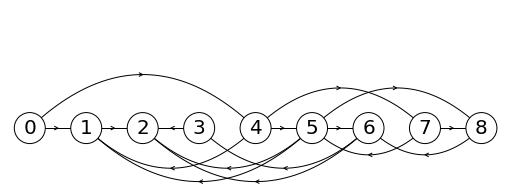

In [11]:
print('===Graph 2 ===')
G =graph_AL.Graph(9,directed = True)
G.insert_edge(0,1)
G.insert_edge(0,4)
G.insert_edge(1,2)
G.insert_edge(3,2)
G.insert_edge(4,1)
G.insert_edge(4,5)
G.insert_edge(4,7)
G.insert_edge(5,1)
G.insert_edge(5,2)
G.insert_edge(5,6)
G.insert_edge(5,8)
G.insert_edge(6,2)
G.insert_edge(6,3)
G.insert_edge(7,5)
G.insert_edge(7,8)
G.insert_edge(8,6)
G.draw(' ')
s = topological_sort(G,trace=True)
print('Topological sort:',s)

Graph representation
directed: True, weighted: False
Adjacency list:
AL[0]=[(1,1), (3,1), (6,1), (5,1)]
AL[1]=[(5,1), (3,1)]
AL[2]=[(0,1), (3,1), (6,1)]
AL[3]=[]
AL[4]=[(2,1)]
AL[5]=[]
AL[6]=[]
AL[7]=[(6,1)]
Q= [4, 7]
in_deg= [1, 1, 1, 3, 0, 2, 3, 0]
v= 4
Q= [7, 2]
in_deg= [1, 1, 0, 3, 0, 2, 3, 0]
v= 7
Q= [2]
in_deg= [1, 1, 0, 3, 0, 2, 2, 0]
v= 2
Q= [0]
in_deg= [0, 1, 0, 2, 0, 2, 1, 0]
v= 0
Q= [1, 6]
in_deg= [0, 0, 0, 1, 0, 1, 0, 0]
v= 1
Q= [6, 5, 3]
in_deg= [0, 0, 0, 0, 0, 0, 0, 0]
v= 6
Q= [5, 3]
in_deg= [0, 0, 0, 0, 0, 0, 0, 0]
v= 5
Q= [3]
in_deg= [0, 0, 0, 0, 0, 0, 0, 0]
v= 3
Q= []
in_deg= [0, 0, 0, 0, 0, 0, 0, 0]
Topological sort: [4, 7, 2, 0, 1, 6, 5, 3]


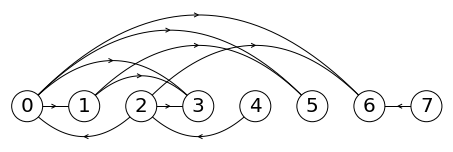

In [12]:
seed = 3 # Set seed to negative value to obtain truly random graphs
G = random_graph(8,11,weighted=False, seed=seed)
G.display()
G.draw()
s = topological_sort(G,trace=True)
print('Topological sort:',s)

## **Exercises**

**Exercise 1.** Write a modified version of Dijkstra's function that returns a list containing the vertices in the visited set in the order they were visited by the algorithm.

In [7]:
def dijkstra(G,source=0,trace=False):
    visited = set()
    L=[]
    if trace:
        L.append(visited)
    return L

**Exercise 2.** Modify the topological sort function to determine if a graph has a unique topological sort. A graph has a unique topological sort if it does not have a cycle and the queue containing the vertices with zero in-degree never has more than one element. 


In [8]:
def topological_sort(G,trace=False):
    in_deg = in_degrees(G)
    ts = []
    Q = [i for i in range(len(in_deg)) if in_deg[i]==0]
    if trace:
      return False
    while len(Q)>0:
        v = Q.pop(0)
        ts.append(v)
        for edge in G.AL[v]:
            u = edge.dest
            in_deg[u] -= 1
            if in_deg[u] == 0:
                Q.append(u)
        if trace:
            return False
    if len(ts) == len(G.AL):
        return True
    return None